In [ ]:
## Import Libraries

In [1]:
import numpy as np
import math
import time
import pymongo
import pandas as pd
import concurrent.futures
import matplotlib.pyplot as plt
import statistics
import numpy as np


In [2]:
## Connect with mongoDb to extract data(High, low, Close, Open, Volume, Date) of stocks

In [3]:
client = pymongo.MongoClient('mongodb://127.0.0.1:27017/')
mydb = client['Algorithmic_Trading']
info = mydb.historical_data_500

symbols = []
for i in info.find():
    symbols.append(i['Symbol'])
    
all_highs = {}
all_lows = {}
all_closes = {}
all_dates = {}
for s in symbols:
    for i in info.find({"Symbol" : s}):
        high = []
        low = []
        closes = []
        dates = []
        for x in i["Data"]:
            high.append(x["High"])
            low.append(x["Low"])
            closes.append(x["Close"])
            dates.append(x["Date"])
            
            
            
    all_highs[s] = high
    all_lows[s] = low
    all_closes[s] = closes
    all_dates[s] = dates     


In [ ]:
## Aroon Indicator Calculation Blueprint

In [4]:

High_data = all_highs[s][-100:]
n = 14
ans = []
for i in range(0,len(High_data) - n):
    sample = High_data[i:i+n+1]
    x = np.argmax(sample)
    aroon = ((n-(n-x))/n)*100
    ans.append(aroon)

Low_data = all_lows[s][-100:]
ans2 = []
for i in range(0,len(Low_data) - n):
    sample = Low_data[i:i+n+1]
    x = np.argmin(sample)
    aroon = ((n-(n-x))/n)*100
    ans2.append(aroon)


In [ ]:
##Backtesting strategy by setting parameters

In [9]:
s = 'APLAPOLLO'
n = 15
High_data = all_highs[s]
aroon_up = []


for i in range(0,len(High_data) - n):
    sample = High_data[i:i+n+1]
    x = np.argmax(sample)
    aroon = ((n-(n-x))/n)*100
    aroon_up.append(aroon)

Low_data = all_lows[s]
aroon_down = []

for i in range(0,len(Low_data) - n):
    sample = Low_data[i:i+n+1]
    x = np.argmin(sample)
    aroon = ((n-(n-x))/n)*100
    aroon_down.append(aroon)

req_closes = all_closes[s][n:]
req_dates = all_dates[s][n:]

total = 0
i = 1



while i < len(aroon_up):

    if aroon_up[i] > aroon_down[i]:

        j = i+1
        if j>=len(aroon_up):
            break
        else:


            buy_price = req_closes[i-1]

            buy_date = req_dates[i-1]

            while  j < (len(aroon_up) -1) and aroon_up[j] > aroon_down[j]:

                j= j+1


            sell_price = req_closes[j]

            sell_date = req_dates[j]

            result = sell_price - buy_price

            total = total + result

            i = j

           
    else :
        i = i + 1

total1 = 0
i = 1



while i < len(aroon_up):

    if aroon_up[i] < aroon_down[i]:

        j = i+1
        if j>=len(aroon_up):
            break
        else:


            buy_price = req_closes[i-1]

            buy_date = req_dates[i-1]

            while  j < (len(aroon_up) -1) and aroon_down[j] > aroon_up[j]:

                j= j+1

  

            sell_price = req_closes[j]

            sell_date = req_dates[j]

            result = buy_price - sell_price

            total1 = total1 + result

            i = j

            
    else :
        i = i + 1
        
total_f = total + total1
total_f

215.44494514465327

In [ ]:
## Finding Optimum value of paramters by backtesting

In [12]:
profit_list = []
optimum_value = 0
max_p = 0


n = 14

while n  < 50 :
    
    s = 'ECLERX'
    trades = 0
   
    High_data = all_highs[s]
    aroon_up = []


    for i in range(0,len(High_data) - n):
        sample = High_data[i:i+n+1]
        x = np.argmax(sample)
        aroon = ((n-(n-x))/n)*100
        aroon_up.append(aroon)

    Low_data = all_lows[s]
    aroon_down = []

    for i in range(0,len(Low_data) - n):
        sample = Low_data[i:i+n+1]
        x = np.argmin(sample)
        aroon = ((n-(n-x))/n)*100
        aroon_down.append(aroon)

    req_closes = all_closes[s][n:]
    req_dates = all_dates[s][n:]

    total = 0
    i = 1



    while i < len(aroon_up):

        if aroon_up[i] > aroon_down[i]:
            
            trades = trades + 1

            j = i+1
            if j>=len(aroon_up):
                break
            else:


                buy_price = req_closes[i-1]

                buy_date = req_dates[i-1]

                while  j < (len(aroon_up) -1) and aroon_up[j] > aroon_down[j]:

                    j= j+1

            

                sell_price = req_closes[j]

                sell_date = req_dates[j]

                result = sell_price - buy_price

                total = total + result

                i = j

        else :
            i = i + 1

    total1 = 0
    i = 1



    while i < len(aroon_up):

        if aroon_up[i] < aroon_down[i]:
            
            trades = trades + 1

            j = i+1
            if j>=len(aroon_up):
                break
            else:


                buy_price = req_closes[i-1]

                buy_date = req_dates[i-1]

                while  j < (len(aroon_up) -1) and aroon_down[j] > aroon_up[j]:

                    j= j+1

               

                sell_price = req_closes[j]

                sell_date = req_dates[j]

                result = buy_price - sell_price

                total1 = total1 + result

                i = j

        else :
            i = i + 1

    total_f = total + total1
    total_f
    
    
    
    if total_f > max_p:
        optimum_value = n
        max_p  = total_f
    n = n+1
    
    profit_list.append(total_f)
        


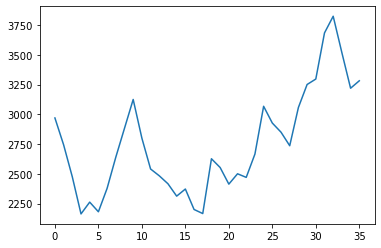

In [13]:
plt.plot(profit_list)